In [62]:
#IMPORTING LIBRARIES:

import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [63]:
#LOADING THE DATA OF FASHION_MNIST

(X_train_full , y_train_full) , (X_test , y_test) = tf.keras.datasets.fashion_mnist.load_data()

# X_valid - first 5000 data for validation and rest 55000 for training - scaled down between 0 to 1 by / with 255 (as data ranges between 0 to 255)
# y_valid - first 5000 data for validation and rest 55000 for training -  not scaled down cause its the actual output

X_valid,X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255.


In [64]:
print(len(X_train))
print(len(X_test))
print(len(X_valid))

55000
10000
5000


In [65]:
X_train.shape

(55000, 28, 28)

In [66]:
y_train.shape

(55000,)

## CLASSIFICATION LABELS:
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

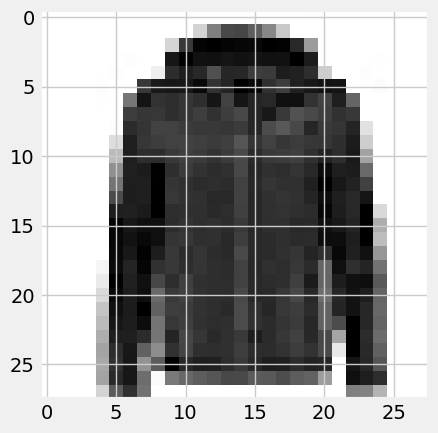

In [67]:
# PLOTTING THE IMAGE:

plt.imshow(X_train[0],cmap="binary")
plt.show()

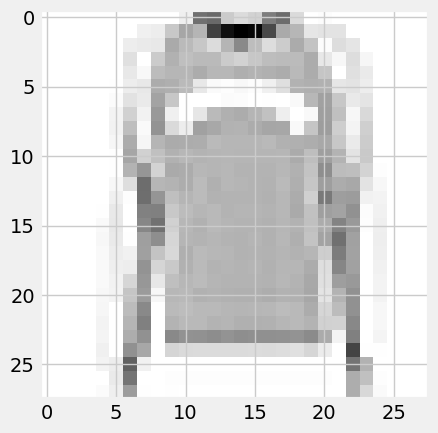

In [68]:
plt.imshow(X_train[100],cmap="binary")
plt.show()

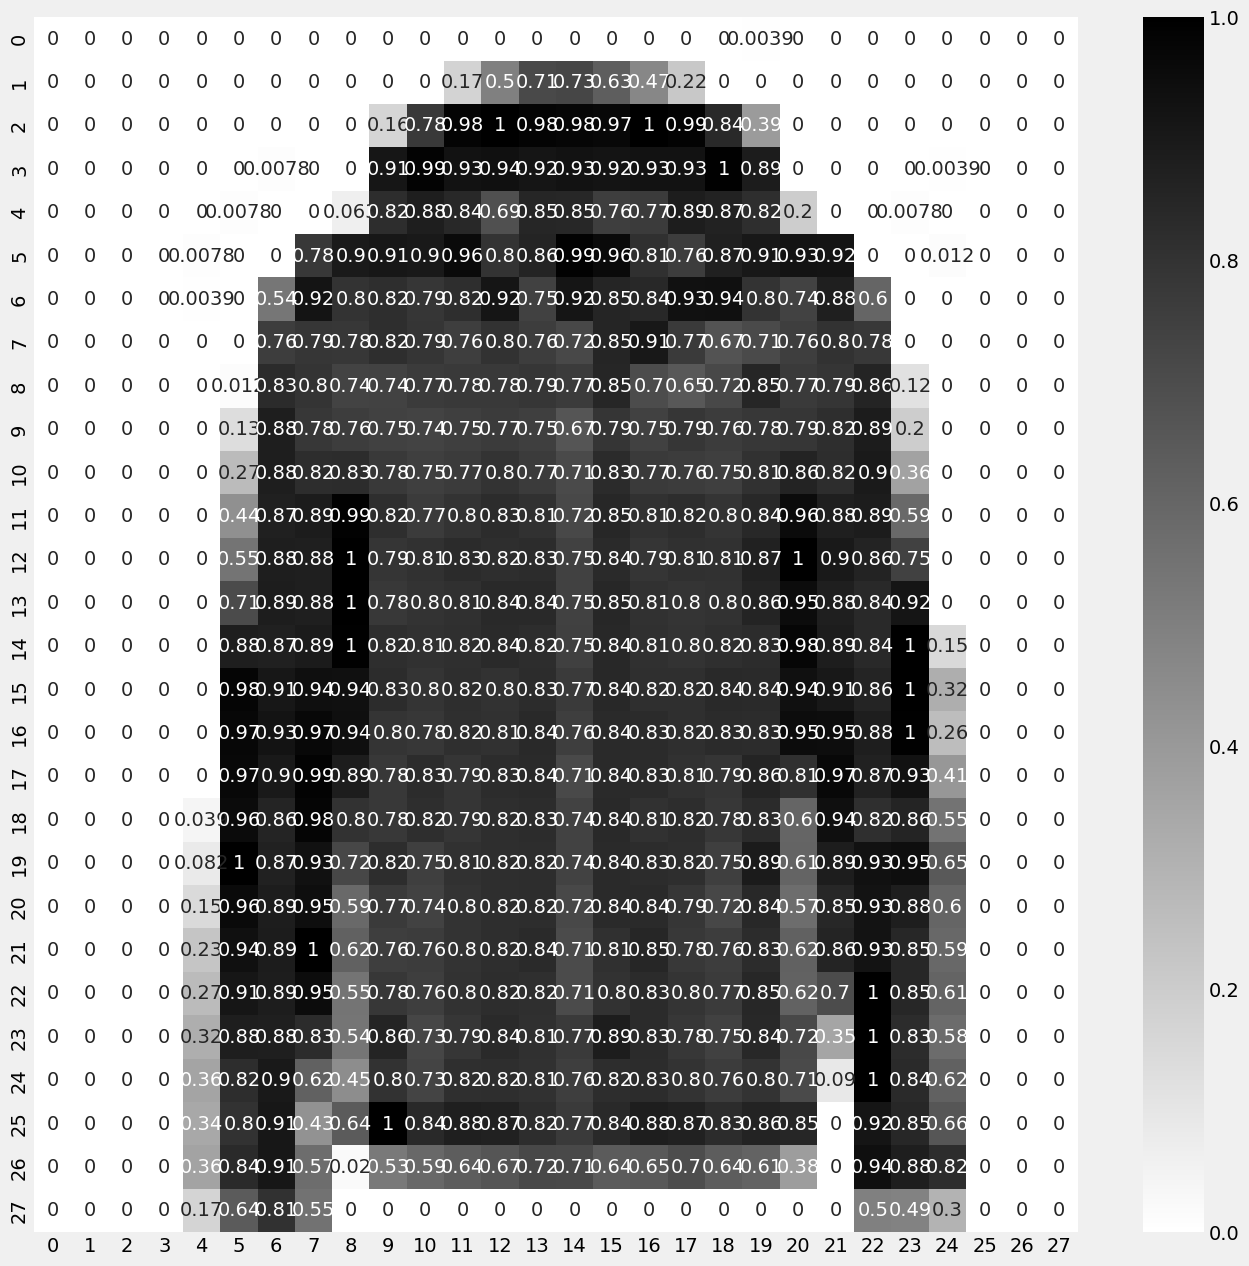

In [69]:
# PLOT OF THE NEW TRAINING DATA WHCH IS SCALED DOWN BETWEEN 0 TO 1:(DIVIDED BY 255)

plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")
plt.show()

In [70]:
# CREATING LAYER OF THE MODEL:

tf.random.set_seed(42)
np.random.seed(42)

LAYERS = [
    tf.keras.layers.Flatten(input_shape=[28,28],name="input_layer"),
    tf.keras.layers.Dense(300,kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100,kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10,activation="softmax")

]

model = tf.keras.models.Sequential(LAYERS)

In [71]:
# COMPILING THE MODEL

model.compile(
    loss = "sparse_categorical_crossentropy",
    # FOR MULTICLASS CLASSIFICATION PROBLEM
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
    # STOCHATIC GRADIENT DESCENT
    metrics=["accuracy"]
)

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 300)               235500    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 300)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               30100     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-tr

In [73]:
# TRAINING THE MODEL:

import time

start = time.time()

history = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),verbose=2)

end = time.time()

print(f"Runtime for the given model is : {end-start}")


Epoch 1/10
1719/1719 - 6s - loss: 1.2094 - accuracy: 0.6287 - val_loss: 0.8450 - val_accuracy: 0.7216 - 6s/epoch - 4ms/step
Epoch 2/10
1719/1719 - 6s - loss: 0.7721 - accuracy: 0.7447 - val_loss: 0.6927 - val_accuracy: 0.7762 - 6s/epoch - 3ms/step
Epoch 3/10
1719/1719 - 6s - loss: 0.6686 - accuracy: 0.7785 - val_loss: 0.6293 - val_accuracy: 0.7932 - 6s/epoch - 3ms/step
Epoch 4/10
1719/1719 - 6s - loss: 0.6123 - accuracy: 0.7962 - val_loss: 0.5789 - val_accuracy: 0.8094 - 6s/epoch - 3ms/step
Epoch 5/10
1719/1719 - 7s - loss: 0.5756 - accuracy: 0.8078 - val_loss: 0.5492 - val_accuracy: 0.8196 - 7s/epoch - 4ms/step
Epoch 6/10
1719/1719 - 5s - loss: 0.5490 - accuracy: 0.8137 - val_loss: 0.5272 - val_accuracy: 0.8276 - 5s/epoch - 3ms/step
Epoch 7/10
1719/1719 - 6s - loss: 0.5287 - accuracy: 0.8198 - val_loss: 0.5089 - val_accuracy: 0.8352 - 6s/epoch - 4ms/step
Epoch 8/10
1719/1719 - 5s - loss: 0.5131 - accuracy: 0.8243 - val_loss: 0.5019 - val_accuracy: 0.8310 - 5s/epoch - 3ms/step
Epoch 9/

In [74]:
history.params

{'verbose': 2, 'epochs': 10, 'steps': 1719}

## APPLYING BATCH NORMALIZATION

In [75]:
# DELETING THE PREVIOUS MODEL
del model

In [76]:
LAYERS_BN = [
    tf.keras.layers.Flatten(input_shape=[28,28],name="input_layer"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation="softmax")
]

model = tf.keras.models.Sequential(LAYERS_BN)

In [77]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_23 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_24 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_5 (Batc  (None, 100)             

In [78]:
# 784 * 2 NON-TRAINABLE PARAMETERS(mean and std-dev) * 2 TRAINABLE PARAMETERS(beta and gamma)
784*2*2 + 300*2*2 + 100*2*2

4736

In [79]:
# NON-TRAINABLE PARAMETERS
(784*2*2 + 300*2*2 + 100*2*2)/2

2368.0

In [80]:
# TRAINABLE PARAMETERS
(784*300 + 300) + (300*100 + 100) + (100*10 + 10) + 2368

268978

In [81]:
bnl = model.layers[1]

In [82]:
for var in bnl.variables:
  print(var.name,var.trainable)

batch_normalization_3/gamma:0 True
batch_normalization_3/beta:0 True
batch_normalization_3/moving_mean:0 False
batch_normalization_3/moving_variance:0 False


In [83]:
# COMPILING THE MODEL

model.compile(
    loss = "sparse_categorical_crossentropy",
    # FOR MULTICLASS CLASSIFICATION PROBLEM
    optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
    # STOCHATIC GRADIENT DESCENT
    metrics=["accuracy"]
)

In [84]:
# TRAINING THE MODEL:

import time

start = time.time()

history = model.fit(X_train,y_train,epochs=15,validation_data=(X_valid,y_valid),verbose=2)

end = time.time()

print(f"Runtime for the given model is : {end-start}")

Epoch 1/15
1719/1719 - 11s - loss: 0.8614 - accuracy: 0.7109 - val_loss: 0.5694 - val_accuracy: 0.8056 - 11s/epoch - 6ms/step
Epoch 2/15
1719/1719 - 9s - loss: 0.5772 - accuracy: 0.8021 - val_loss: 0.4876 - val_accuracy: 0.8362 - 9s/epoch - 6ms/step
Epoch 3/15
1719/1719 - 8s - loss: 0.5168 - accuracy: 0.8217 - val_loss: 0.4517 - val_accuracy: 0.8452 - 8s/epoch - 5ms/step
Epoch 4/15
1719/1719 - 9s - loss: 0.4796 - accuracy: 0.8331 - val_loss: 0.4314 - val_accuracy: 0.8500 - 9s/epoch - 5ms/step
Epoch 5/15
1719/1719 - 9s - loss: 0.4535 - accuracy: 0.8424 - val_loss: 0.4139 - val_accuracy: 0.8560 - 9s/epoch - 5ms/step
Epoch 6/15
1719/1719 - 8s - loss: 0.4375 - accuracy: 0.8463 - val_loss: 0.4030 - val_accuracy: 0.8594 - 8s/epoch - 4ms/step
Epoch 7/15
1719/1719 - 9s - loss: 0.4239 - accuracy: 0.8523 - val_loss: 0.3916 - val_accuracy: 0.8632 - 9s/epoch - 5ms/step
Epoch 8/15
1719/1719 - 9s - loss: 0.4102 - accuracy: 0.8560 - val_loss: 0.3874 - val_accuracy: 0.8650 - 9s/epoch - 5ms/step
Epoch 

In [85]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.861444,0.710945,0.569416,0.8056
1,0.577154,0.802073,0.487616,0.8362
2,0.516839,0.821655,0.451722,0.8452
3,0.479617,0.833145,0.431399,0.8500
4,0.453530,0.842436,0.413880,0.8560
5,0.437527,0.846327,0.402997,0.8594
6,0.423884,0.852327,0.391619,0.8632
7,0.410224,0.856018,0.387442,0.8650
8,0.400630,0.859473,0.380618,0.8654
9,0.389738,0.864436,0.374528,0.8668


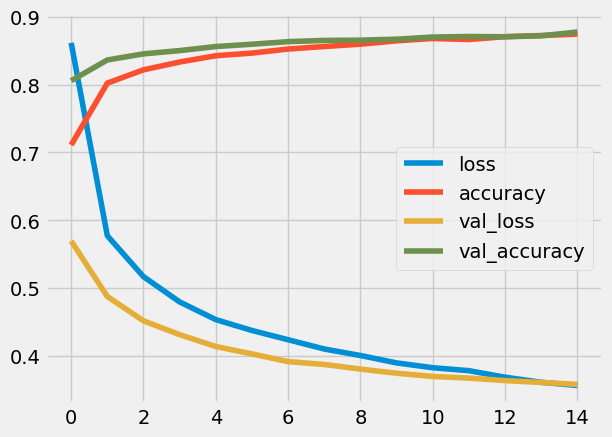

In [86]:
pd.DataFrame(history.history).plot()
plt.show()

In [88]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3829 - accuracy: 0.8660


[0.382862389087677, 0.8659999966621399]

In [89]:
pred = model.predict(X_test)


313/313 [==============================] - 1s 3ms/step


In [90]:
pred[2]

array([1.0329221e-04, 9.9951404e-01, 3.8076018e-05, 5.7870606e-05,
       5.7602123e-05, 1.1233477e-04, 4.4814119e-06, 5.3786869e-05,
       4.9758957e-05, 8.5954980e-06], dtype=float32)

In [91]:
np.argmax(pred[2])


1

In [92]:
y_test[2]

1

In [94]:
pred = model.predict(X_test)
preds = [np.argmax(i) for i in pred]


313/313 [==============================] - 1s 2ms/step


In [95]:
cm = tf.math.confusion_matrix(labels = y_test, predictions= preds)


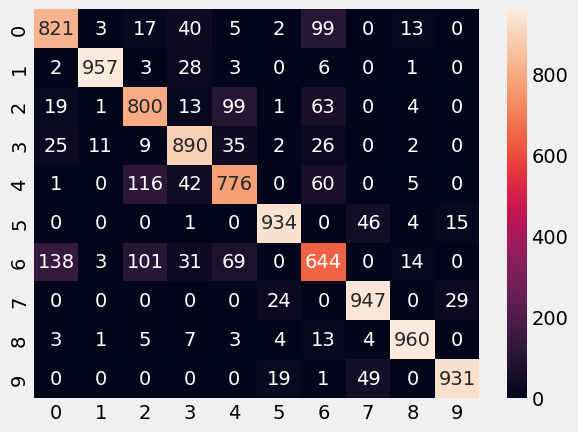

In [97]:
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()


In [99]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))


0.866
